## Chapter 3

## Overview of Machine Learning and Deep Learning Concepts

This chapter is focused on exploring the realm of machine learning and deep learning algorithms. 


In [4]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb

In [7]:
# import all the libraries required for this chapter
# Machine Learning Libraries: scikit-learn, keras and tensorflow

# setting seed for model reproducibility
seed_value = 42
import os
os.environ['PYTHONHASHSEED'] = str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)
import pandas as pd

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import normalize, Normalizer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn import metrics
from sklearn.compose import ColumnTransformer
import sklearn.cluster as cluster
import lightgbm as lgb
import xgboost as xgb

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
# from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
# from keras.utils import np_utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# plotting libraries
import matplotlib as mpl
import matplotlib.style
import seaborn as sns  # visualization
import matplotlib.pyplot as plt
# formatting for decimal places
pd.set_option("display.float_format", "{:.2f}".format)

sns.set_style("white")
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the .csv file as a dataframe - Raw Data File
data = pd.read_csv('./data/Merged_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5127 entries, 0 to 5126
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WELL NAME             5127 non-null   object 
 1   DEPTH (M)             5127 non-null   float64
 2   BVW (V/V)             4891 non-null   float64
 3   CARB_FLAG (UNITLESS)  4980 non-null   float64
 4   COAL_FLAG (UNITLESS)  5127 non-null   float64
 5   KLOGH (MD)            4891 non-null   float64
 6   PHIF (V/V)            4891 non-null   float64
 7   RHOFL (G/CM3)         5127 non-null   float64
 8   RHOMA (G/CM3)         4891 non-null   float64
 9   RW (OHMM)             4891 non-null   float64
 10  SAND_FLAG (UNITLESS)  4891 non-null   float64
 11  SW (V/V)              4891 non-null   float64
 12  TEMP (DEGC)           4891 non-null   float64
 13  VSH (V/V)             4891 non-null   float64
 14  LITHOTYPE             5127 non-null   object 
dtypes: float64(13), objec

In [3]:
# Basic Exploratory Data Analysis and Data Cleaning
print(data.head(10))
print('Shape of Dataset (rows,columns):', data.shape)

   WELL NAME  DEPTH (M)  BVW (V/V)  CARB_FLAG (UNITLESS)  \
0  15/9-19 A    3666.59       0.11                  0.00   
1  15/9-19 A    3666.74       0.11                  0.00   
2  15/9-19 A    3666.90       0.11                  0.00   
3  15/9-19 A    3667.05       0.11                  0.00   
4  15/9-19 A    3667.20       0.12                  0.00   
5  15/9-19 A    3667.35       0.11                  0.00   
6  15/9-19 A    3667.51       0.12                  0.00   
7  15/9-19 A    3667.66       0.12                  0.00   
8  15/9-19 A    3667.81       0.13                  0.00   
9  15/9-19 A    3667.96       0.13                  0.00   

   COAL_FLAG (UNITLESS)  KLOGH (MD)  PHIF (V/V)  RHOFL (G/CM3)  RHOMA (G/CM3)  \
0                  0.00        0.00        0.20           0.80           2.66   
1                  0.00        0.00        0.22           0.80           2.66   
2                  0.00        0.00        0.24           0.80           2.66   
3              

Until this point there is no data cleaning being performed. The objective of the next few sections is to wrangle the data and prepare it for the machine learning model stage. The current dataset consists of petrophysical properties from two different wells in Volve field. A majority of columns have float datatype except Well Name and Lithotype. In the case of regression problems, only quantitative columns would be considered, whereas in the case of classification, 'Lithotype' would be the response variable. 

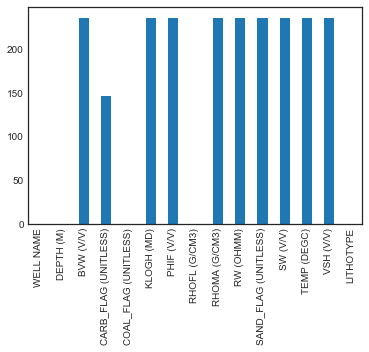

In [4]:
# Find number of empty/NA values in each column
data.isna().sum().plot(kind="bar")

In [5]:
# Descriptive Statistics
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
WELL NAME,5127,2,15/9-19 BT2,3162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEPTH (M),5127.00,NaN,NaN,NaN,3935.10,153.56,3666.59,3814.95,3912.57,4054.53,4249.83
BVW (V/V),4891.00,NaN,NaN,NaN,0.10,0.06,0.00,0.06,0.09,0.12,0.25
CARB_FLAG (UNITLESS),4980.00,NaN,NaN,NaN,0.03,0.18,0.00,0.00,0.00,0.00,1.00
COAL_FLAG (UNITLESS),5127.00,NaN,NaN,NaN,0.01,0.07,0.00,0.00,0.00,0.00,1.00
KLOGH (MD),4891.00,NaN,NaN,NaN,199.85,700.43,0.00,0.00,0.00,23.31,13705.31
PHIF (V/V),4891.00,NaN,NaN,NaN,0.14,0.06,0.00,0.10,0.14,0.20,0.36
RHOFL (G/CM3),5127.00,NaN,NaN,NaN,0.86,0.05,0.80,0.80,0.90,0.90,0.90
RHOMA (G/CM3),4891.00,NaN,NaN,NaN,2.66,0.01,2.63,2.65,2.66,2.66,2.71
RW (OHMM),4891.00,NaN,NaN,NaN,0.02,0.00,0.02,0.02,0.02,0.02,0.02


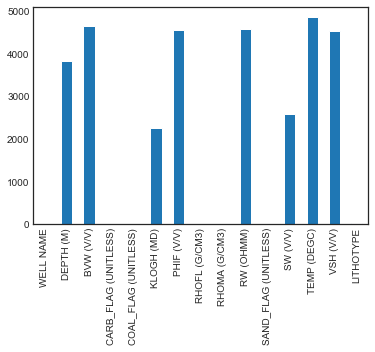

In [6]:
# Number of unique values
data.nunique().plot(kind="bar")

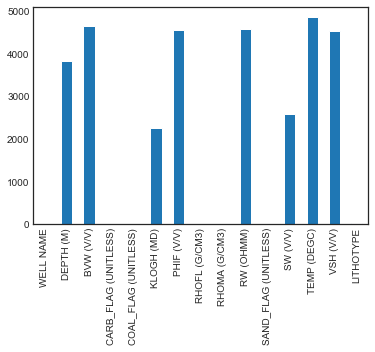

In [7]:
# Number of unique values
data.nunique().plot(kind="bar")

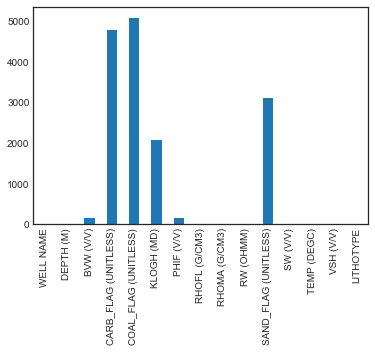

In [8]:
# Data Cleaning - How many columns have Null or value=0
data[data == 0].count(axis=0).plot(kind='bar')

In [9]:
data.dropna(inplace=True)
print('Shape of Dataset (rows,columns):', data.shape)

Shape of Dataset (rows,columns): (4818, 15)


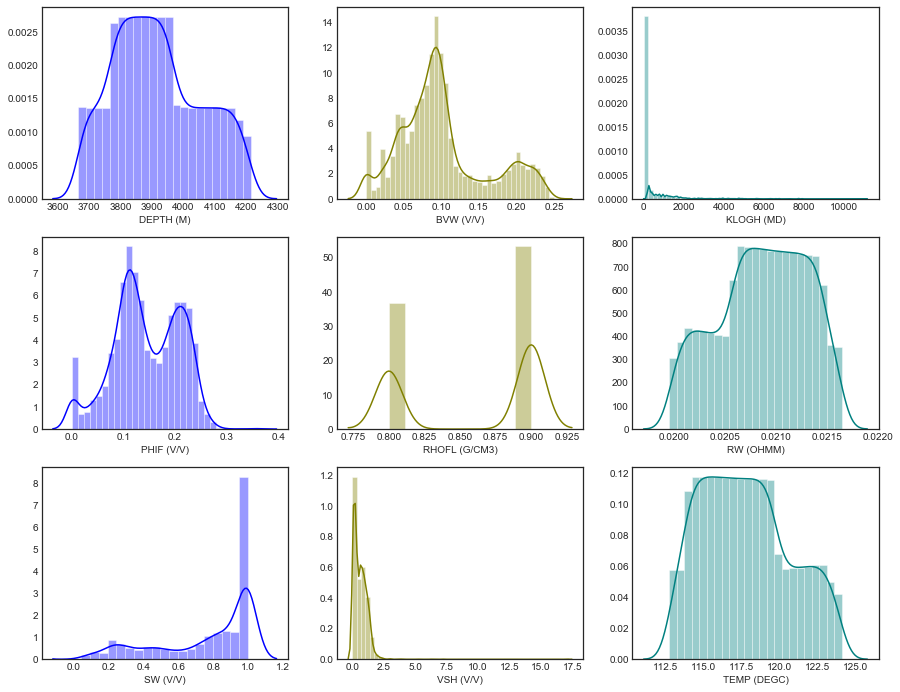

In [10]:
# Histogram - Distributions of continuous variables - only key features are shown here
# sns.set(color_codes=True)
f, axes = plt.subplots(3, 3, figsize=(15, 12), sharex=False)
sns.distplot(data["DEPTH (M)"], color="blue", ax=axes[0, 0])
sns.distplot(data["BVW (V/V)"], color="olive", ax=axes[0, 1])
sns.distplot(data["KLOGH (MD)"], color="teal", ax=axes[0, 2])
sns.distplot(data["PHIF (V/V)"], color="blue", ax=axes[1, 0])
sns.distplot(data["RHOFL (G/CM3)"], color="olive", ax=axes[1, 1])
sns.distplot(data["RW (OHMM)"], color="teal", ax=axes[1, 2])
sns.distplot(data["SW (V/V)"], color="blue", ax=axes[2, 0])
sns.distplot(data["VSH (V/V)"], color="olive", ax=axes[2, 1])
sns.distplot(data["TEMP (DEGC)"], color="teal", ax=axes[2, 2])

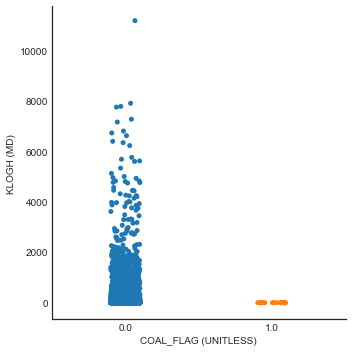

In [11]:
# plotting some categorical variables
sns.catplot(x="COAL_FLAG (UNITLESS)", y="KLOGH (MD)", data=data)
# sns.catplot(x="SAND_FLAG (UNITLESS)", y="KLOGH (MD)", data=data)
# sns.catplot(x="RHOFL (G/CM3)", y="KLOGH (MD)", data=data)

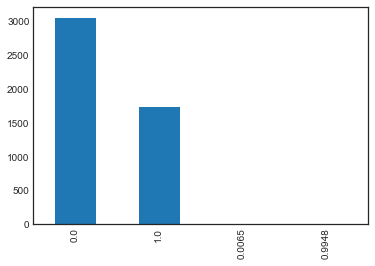

In [12]:
# data['CARB_FLAG (UNITLESS)'].value_counts().plot(kind='bar')
# data['COAL_FLAG (UNITLESS)'].value_counts().plot(kind='bar')
data['SAND_FLAG (UNITLESS)'].value_counts().plot(kind='bar')

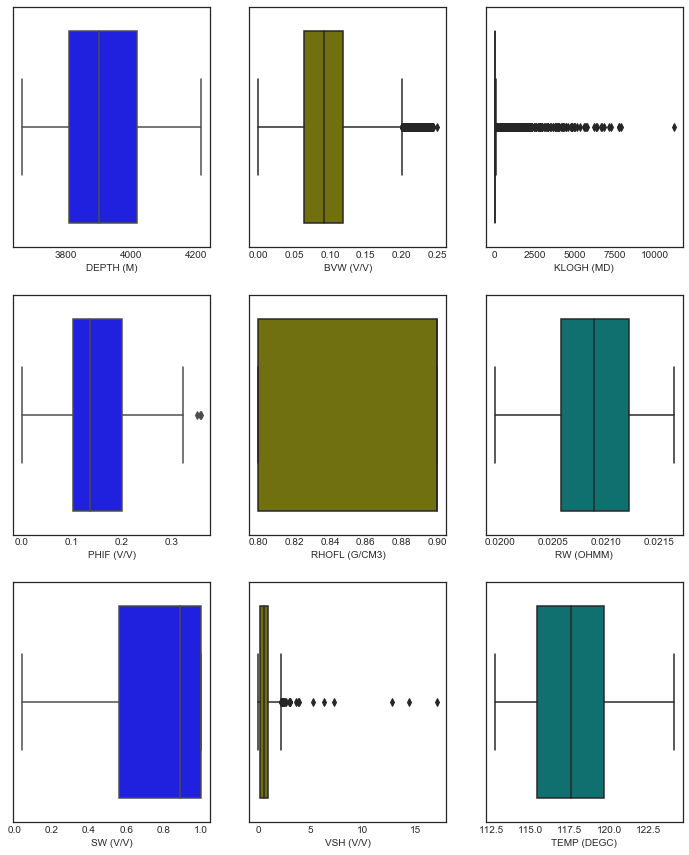

In [13]:
# Box Plots - Useful Tool to detect outliers
f, axes = plt.subplots(3, 3, figsize=(12, 15), sharex=False)
sns.boxplot(data["DEPTH (M)"], color="blue", ax=axes[0, 0])
sns.boxplot(data["BVW (V/V)"], color="olive", ax=axes[0, 1])
sns.boxplot(data["KLOGH (MD)"], color="teal", ax=axes[0, 2])
sns.boxplot(data["PHIF (V/V)"], color="blue", ax=axes[1, 0])
sns.boxplot(data["RHOFL (G/CM3)"], color="olive", ax=axes[1, 1])
sns.boxplot(data["RW (OHMM)"], color="teal", ax=axes[1, 2])
sns.boxplot(data["SW (V/V)"], color="blue", ax=axes[2, 0])
sns.boxplot(data["VSH (V/V)"], color="olive", ax=axes[2, 1])
sns.boxplot(data["TEMP (DEGC)"], color="teal", ax=axes[2, 2])

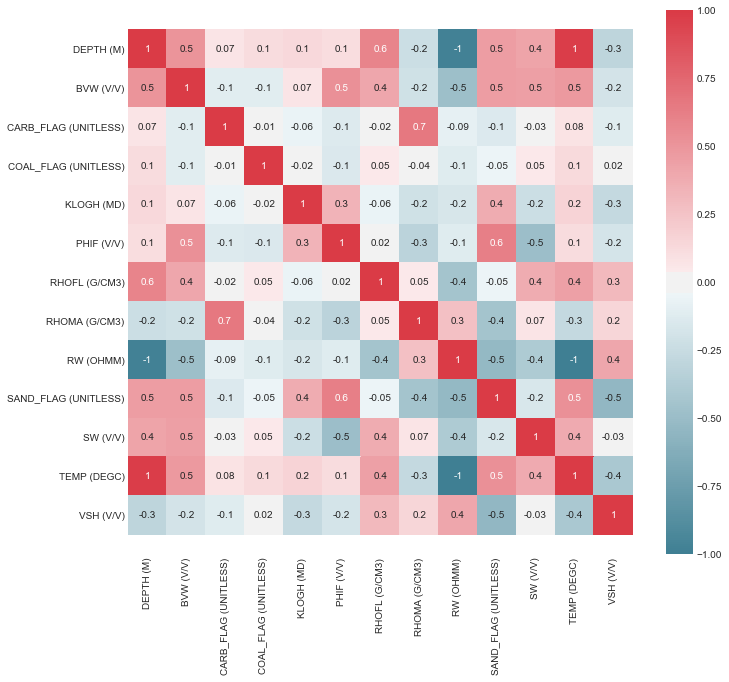

In [14]:
# heatmap to visualize any collinearlity between variables
plt.figure(figsize=(12, 10))
# Colormap definition
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), annot=True, fmt='.1g', vmin=-
            1, vmax=1, center=0, cmap=cmap, square=True)
# matplotlib issue with truncation of top and bottom row
b, t = plt.ylim()
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ]),
 <a list of 10 Text xticklabel objects>)

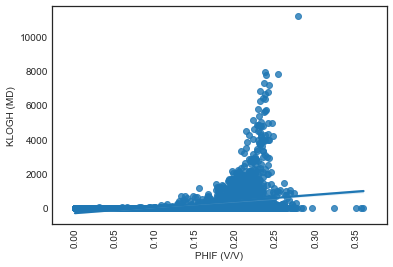

In [15]:
# An example of plot to check collinearity between certain variables
# looking into the correlation between Spacing and NN Spacing - All Zone/Same Zone
sns.regplot(x='PHIF (V/V)', y='KLOGH (MD)', data=data)
plt.xticks(rotation=90)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4890
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WELL NAME             4818 non-null   object 
 1   DEPTH (M)             4818 non-null   float64
 2   BVW (V/V)             4818 non-null   float64
 3   CARB_FLAG (UNITLESS)  4818 non-null   float64
 4   COAL_FLAG (UNITLESS)  4818 non-null   float64
 5   KLOGH (MD)            4818 non-null   float64
 6   PHIF (V/V)            4818 non-null   float64
 7   RHOFL (G/CM3)         4818 non-null   float64
 8   RHOMA (G/CM3)         4818 non-null   float64
 9   RW (OHMM)             4818 non-null   float64
 10  SAND_FLAG (UNITLESS)  4818 non-null   float64
 11  SW (V/V)              4818 non-null   float64
 12  TEMP (DEGC)           4818 non-null   float64
 13  VSH (V/V)             4818 non-null   float64
 14  LITHOTYPE             4818 non-null   object 
dtypes: float64(13), objec

In [17]:
# separate categorical columns
columns_categ = ['WELL NAME', 'LITHOTYPE']
data_cont = data.drop(data[columns_categ], axis=1)  # continous data
# move response variable to end of dataframe
data_cont = data_cont[[col for col in data_cont.columns if col != 'KLOGH (MD)'] + ['KLOGH (MD)']]
data_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4890
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DEPTH (M)             4818 non-null   float64
 1   BVW (V/V)             4818 non-null   float64
 2   CARB_FLAG (UNITLESS)  4818 non-null   float64
 3   COAL_FLAG (UNITLESS)  4818 non-null   float64
 4   PHIF (V/V)            4818 non-null   float64
 5   RHOFL (G/CM3)         4818 non-null   float64
 6   RHOMA (G/CM3)         4818 non-null   float64
 7   RW (OHMM)             4818 non-null   float64
 8   SAND_FLAG (UNITLESS)  4818 non-null   float64
 9   SW (V/V)              4818 non-null   float64
 10  TEMP (DEGC)           4818 non-null   float64
 11  VSH (V/V)             4818 non-null   float64
 12  KLOGH (MD)            4818 non-null   float64
dtypes: float64(13)
memory usage: 687.0 KB


In [18]:
# Splitting the dataset
X = data_cont.iloc[:, :-1]
y = data_cont.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
print('Shape of Training X:', X_train.shape)
print('Shape of Training y:', y_train.shape)
print('Shape of Test X:', X_test.shape)
print('Shape of Test y:', y_test.shape)

Shape of Training X: (3613, 12)
Shape of Training y: (3613,)
Shape of Test X: (1205, 12)
Shape of Test y: (1205,)


## Regression Algorithms

In [20]:
# defining some functions for regression
# Regression

def reg_metrics(test, pred):
    '''Function returns basic metrics for regression models'''
    print('Mean Absolute Error:', metrics.mean_absolute_error(test, pred))
    print('Mean Squared Error:', metrics.mean_squared_error(test, pred))
    print('Root Mean Squared Error:', np.sqrt(
        metrics.mean_squared_error(test, pred)))
    print('R Squared:', (metrics.r2_score(test, pred)))

def reg_plot(test, pred):
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.show()

def scatter_plot_comparison(test, pred):
    '''Function returns a comparison between test data and predictions, in the form of line plot'''
    sns.scatterplot(test.index, test.values, color='red', label='Test data')
    sns.scatterplot(test.index, pred, color='blue', label='Predicted data')
    plt.title('Prediction')
    plt.xlabel('Observations')
    plt.ylabel('Test and Predicted Values')
    plt.legend()
    plt.show()

def line_plot_comparison(test, pred):
    '''Function returns a comparison between test data and predictions, in the form of line plot'''
    plt.plot(test.values, color='red', label='Test data')
    plt.plot(pred, color='blue', label='Predicted data')
    plt.title('Prediction')
    plt.xlabel('Observations')
    plt.ylabel('Test and Predicted Values')
    plt.legend()
    plt.show()

68011.74767175628
[-3.01082813e+01 -1.11653769e+04  3.73278552e+01 -2.62541748e+01
  1.09989811e+04  1.84402537e+04 -2.10856484e+03 -3.00183765e+06
  2.29195288e+02  1.54312725e+03  8.56714954e+02 -1.76746093e+02]


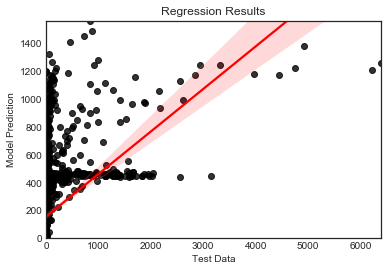

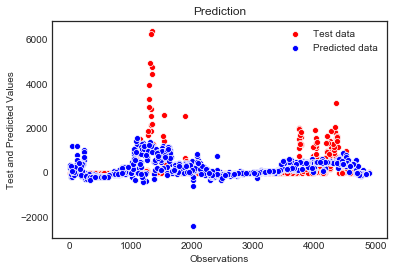

Mean Absolute Error: 283.8971784377556
Mean Squared Error: 245181.58921373505
Root Mean Squared Error: 495.1581456602881
R Squared: 0.14882285596030154


In [21]:
# 1. MLR - Multi Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # training the algorithm
print(lin_reg.intercept_)  # intercept
print(lin_reg.coef_)  # coefficients
# Prediction on test data
y_pred_lin = lin_reg.predict(X_test)
# Regression Plot - Linear Regression
reg_plot(y_test, y_pred_lin)
scatter_plot_comparison(y_test, y_pred_lin)
# Metrics for Linear Regression
reg_metrics(y_test, y_pred_lin)

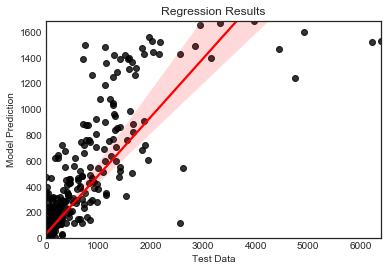

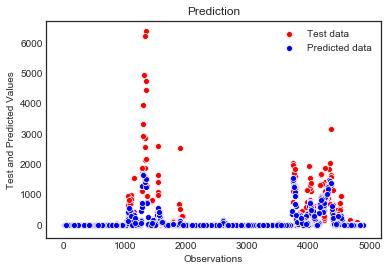

Mean Absolute Error: 82.06389051208197
Mean Squared Error: 112564.26261124818
Root Mean Squared Error: 335.5059799932755
R Squared: 0.6092197302512246


In [22]:
# 2. Support Vector Regression (SVR)
# gaussian kernel selected due to non-linearity in dataset
# Radial basis function - kernel is shown here, other available kernels include 'linear, sigmoid and polynomial'
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_reg.fit(X_train, y_train)
# Prediction on test data
y_pred_svr = svr_reg.predict(X_test)
# Regression Plot - SVR
reg_plot(y_test, y_pred_svr)
scatter_plot_comparison(y_test, y_pred_svr)
# Metrics for SVR
reg_metrics(y_test, y_pred_svr)

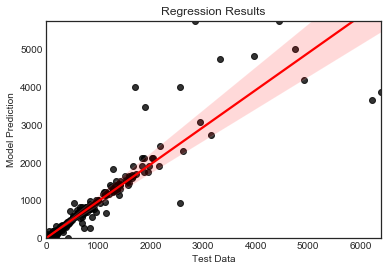

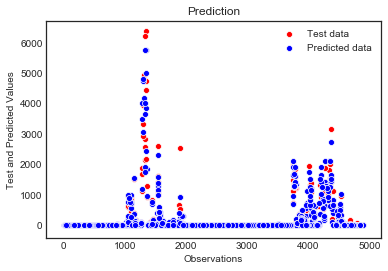

Mean Absolute Error: 29.73391044401977
Mean Squared Error: 35097.83335297129
Root Mean Squared Error: 187.34415750957191
R Squared: 0.8781536833529513


In [23]:
# 3. Decision Tree - Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
# Prediction on test data
y_pred_dt = dt_reg.predict(X_test)
# Regression Plot - Decision Tree
reg_plot(y_test, y_pred_dt)
scatter_plot_comparison(y_test, y_pred_dt)
# Metrics for Decision Tree
reg_metrics(y_test, y_pred_dt)

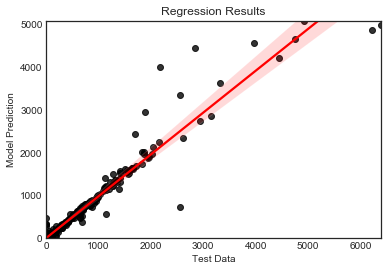

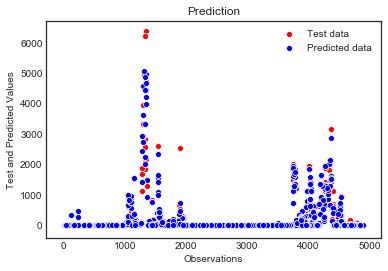

Mean Absolute Error: 20.0011266166531
Mean Squared Error: 14744.082604216954
Root Mean Squared Error: 121.4252140381764
R Squared: 0.948814157854232


In [24]:
# 4. Random Forest - Regression
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
# Prediction on test data
y_pred_rf = rf_reg.predict(X_test)
# Regression Plot - Random Forest
reg_plot(y_test, y_pred_rf)
scatter_plot_comparison(y_test, y_pred_rf)
# Metrics for Random Forest
reg_metrics(y_test, y_pred_rf)

[23:59:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


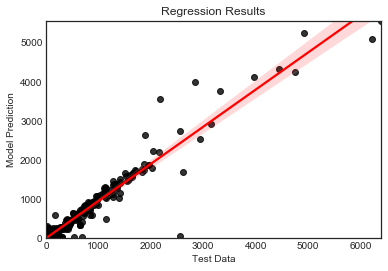

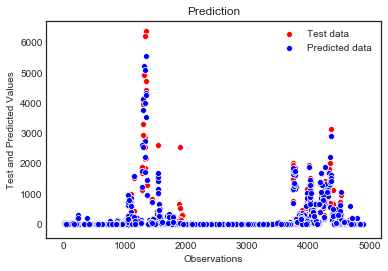

Mean Absolute Error: 34.95929924279304
Mean Squared Error: 14853.490861224791
Root Mean Squared Error: 121.87489840498243
R Squared: 0.948434334034536


In [25]:
# 5. XGBoost - Regression
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
# Prediction on test data
y_pred_xgb = xgb_reg.predict(X_test)
# Regression Plot - XGBoost
reg_plot(y_test, y_pred_xgb)
scatter_plot_comparison(y_test, y_pred_xgb)
# Metrics for XGBoost
reg_metrics(y_test, y_pred_xgb)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________
Train on 2709 samples, validate on 904 samples
Epoch 1/1000
2709/2709 [==============================] - 1s 277us/sample - loss: 587837.7481 - mse: 587837.6875 - val_loss: 442610.7246 - val_mse: 442610.7188
Epoch 2/1000
2709/2709 [==============================] - 0s 59us/sample - loss: 581138.6082 - mse: 581138.5000 - val_loss: 432211.9517 - val_mse: 432211.9375
Epoch 3/1000
2709/

2709/2709 [==============================] - 0s 47us/sample - loss: 277905.8220 - mse: 277905.7812 - val_loss: 164755.1723 - val_mse: 164755.1719
Epoch 99/1000
2709/2709 [==============================] - 0s 44us/sample - loss: 275920.1890 - mse: 275920.1875 - val_loss: 162727.9656 - val_mse: 162727.9531
Epoch 100/1000
2709/2709 [==============================] - 0s 46us/sample - loss: 274623.0133 - mse: 274623.0000 - val_loss: 161374.6138 - val_mse: 161374.6094
Epoch 101/1000
2709/2709 [==============================] - 0s 45us/sample - loss: 272409.7258 - mse: 272409.8125 - val_loss: 160620.2960 - val_mse: 160620.2812
Epoch 102/1000
2709/2709 [==============================] - 0s 45us/sample - loss: 270828.7107 - mse: 270828.7812 - val_loss: 158971.7259 - val_mse: 158971.7344
Epoch 103/1000
2709/2709 [==============================] - 0s 56us/sample - loss: 269451.6434 - mse: 269451.6250 - val_loss: 158192.8868 - val_mse: 158192.8906
Epoch 104/1000
2709/2709 [========================

Epoch 149/1000
2709/2709 [==============================] - 0s 43us/sample - loss: 211724.3240 - mse: 211724.3125 - val_loss: 116231.2396 - val_mse: 116231.2422
Epoch 150/1000
2709/2709 [==============================] - 0s 48us/sample - loss: 210149.7599 - mse: 210149.7812 - val_loss: 116855.8446 - val_mse: 116855.8438
Epoch 151/1000
2709/2709 [==============================] - 0s 45us/sample - loss: 210022.3818 - mse: 210022.3438 - val_loss: 115728.5685 - val_mse: 115728.5625
Epoch 152/1000
2709/2709 [==============================] - 0s 55us/sample - loss: 208413.2853 - mse: 208413.2656 - val_loss: 114667.3899 - val_mse: 114667.3828
Epoch 153/1000
2709/2709 [==============================] - 0s 41us/sample - loss: 208257.5732 - mse: 208257.5625 - val_loss: 114580.6067 - val_mse: 114580.5938
Epoch 154/1000
2709/2709 [==============================] - 0s 49us/sample - loss: 206821.0233 - mse: 206821.0156 - val_loss: 113496.1538 - val_mse: 113496.1562
Epoch 155/1000
2709/2709 [========

2709/2709 [==============================] - 0s 48us/sample - loss: 171729.1939 - mse: 171729.1875 - val_loss: 94425.5148 - val_mse: 94425.5156
Epoch 201/1000
2709/2709 [==============================] - 0s 43us/sample - loss: 171565.8821 - mse: 171565.8750 - val_loss: 93123.2176 - val_mse: 93123.2188
Epoch 202/1000
2709/2709 [==============================] - 0s 60us/sample - loss: 171169.1941 - mse: 171169.1406 - val_loss: 92543.0593 - val_mse: 92543.0547
Epoch 203/1000
2709/2709 [==============================] - 0s 44us/sample - loss: 168966.3094 - mse: 168966.3125 - val_loss: 96413.1406 - val_mse: 96413.1250
Epoch 204/1000
2709/2709 [==============================] - 0s 43us/sample - loss: 169180.9147 - mse: 169180.9375 - val_loss: 92186.6759 - val_mse: 92186.6641
Epoch 205/1000
2709/2709 [==============================] - 0s 48us/sample - loss: 168613.6639 - mse: 168613.6406 - val_loss: 92521.9980 - val_mse: 92521.9922
Epoch 206/1000
2709/2709 [==============================] - 0

2709/2709 [==============================] - 0s 46us/sample - loss: 127404.2420 - mse: 127404.2109 - val_loss: 70719.3754 - val_mse: 70719.3750
Epoch 303/1000
2709/2709 [==============================] - 0s 45us/sample - loss: 128157.4909 - mse: 128157.4688 - val_loss: 69806.4194 - val_mse: 69806.4219
Epoch 304/1000
2709/2709 [==============================] - 0s 45us/sample - loss: 127293.7653 - mse: 127293.7422 - val_loss: 72427.5894 - val_mse: 72427.5859
Epoch 305/1000
2709/2709 [==============================] - 0s 45us/sample - loss: 126721.1959 - mse: 126721.1797 - val_loss: 69327.9613 - val_mse: 69327.9609
Epoch 306/1000
2709/2709 [==============================] - 0s 46us/sample - loss: 127338.3228 - mse: 127338.3359 - val_loss: 69708.4283 - val_mse: 69708.4219
Epoch 307/1000
2709/2709 [==============================] - 0s 45us/sample - loss: 125987.4819 - mse: 125987.4844 - val_loss: 68688.8150 - val_mse: 68688.8125
Epoch 308/1000
2709/2709 [==============================] - 0

2709/2709 [==============================] - 0s 43us/sample - loss: 103328.7661 - mse: 103328.7656 - val_loss: 57545.3132 - val_mse: 57545.3125
Epoch 405/1000
2709/2709 [==============================] - 0s 49us/sample - loss: 101514.6161 - mse: 101514.6094 - val_loss: 61566.6318 - val_mse: 61566.6289
Epoch 406/1000
2709/2709 [==============================] - 0s 52us/sample - loss: 103435.3341 - mse: 103435.3438 - val_loss: 58817.4371 - val_mse: 58817.4336
Epoch 407/1000
2709/2709 [==============================] - 0s 52us/sample - loss: 102400.0521 - mse: 102400.0469 - val_loss: 57355.1567 - val_mse: 57355.1562
Epoch 408/1000
2709/2709 [==============================] - 0s 42us/sample - loss: 103129.1023 - mse: 103129.1172 - val_loss: 57140.8721 - val_mse: 57140.8711
Epoch 409/1000
2709/2709 [==============================] - 0s 43us/sample - loss: 102276.5545 - mse: 102276.5391 - val_loss: 56917.9897 - val_mse: 56917.9883
Epoch 410/1000
2709/2709 [==============================] - 0

2709/2709 [==============================] - 0s 47us/sample - loss: 93814.2475 - mse: 93814.2656 - val_loss: 55956.6235 - val_mse: 55956.6289
Epoch 457/1000
2709/2709 [==============================] - 0s 47us/sample - loss: 94477.3982 - mse: 94477.4219 - val_loss: 53107.1277 - val_mse: 53107.1250
Epoch 458/1000
2709/2709 [==============================] - 0s 45us/sample - loss: 93991.2512 - mse: 93991.2500 - val_loss: 52090.6729 - val_mse: 52090.6758
Epoch 459/1000
2709/2709 [==============================] - 0s 47us/sample - loss: 93896.0995 - mse: 93896.0938 - val_loss: 54702.2763 - val_mse: 54702.2695
Epoch 460/1000
2709/2709 [==============================] - 0s 42us/sample - loss: 92924.0455 - mse: 92924.0547 - val_loss: 52489.1042 - val_mse: 52489.1055
Epoch 461/1000
2709/2709 [==============================] - 0s 49us/sample - loss: 94190.7039 - mse: 94190.6953 - val_loss: 50945.0832 - val_mse: 50945.0859
Epoch 462/1000
2709/2709 [==============================] - 0s 49us/sampl

2709/2709 [==============================] - 0s 54us/sample - loss: 79175.9063 - mse: 79175.9219 - val_loss: 47798.3299 - val_mse: 47798.3281
Epoch 561/1000
2709/2709 [==============================] - 0s 46us/sample - loss: 80455.8260 - mse: 80455.8359 - val_loss: 47590.2649 - val_mse: 47590.2578
Epoch 562/1000
2709/2709 [==============================] - 0s 45us/sample - loss: 79726.4837 - mse: 79726.4688 - val_loss: 46021.4296 - val_mse: 46021.4258
Epoch 563/1000
2709/2709 [==============================] - 0s 45us/sample - loss: 80568.8093 - mse: 80568.8125 - val_loss: 49815.7459 - val_mse: 49815.7461
Epoch 564/1000
2709/2709 [==============================] - 0s 46us/sample - loss: 79511.0164 - mse: 79511.0234 - val_loss: 50403.7273 - val_mse: 50403.7305
Epoch 565/1000
2709/2709 [==============================] - 0s 45us/sample - loss: 79202.6600 - mse: 79202.6484 - val_loss: 46534.6804 - val_mse: 46534.6875
Epoch 566/1000
2709/2709 [==============================] - 0s 45us/sampl

2709/2709 [==============================] - 0s 43us/sample - loss: 68839.7997 - mse: 68839.8047 - val_loss: 43038.1810 - val_mse: 43038.1758
Epoch 665/1000
2709/2709 [==============================] - 0s 55us/sample - loss: 68066.9968 - mse: 68067.0000 - val_loss: 44596.1960 - val_mse: 44596.1992
Epoch 666/1000
2709/2709 [==============================] - 0s 52us/sample - loss: 70435.0603 - mse: 70435.0469 - val_loss: 45578.5668 - val_mse: 45578.5703
Epoch 667/1000
2709/2709 [==============================] - 0s 46us/sample - loss: 69468.7032 - mse: 69468.6953 - val_loss: 42491.8818 - val_mse: 42491.8789
Epoch 668/1000
2709/2709 [==============================] - 0s 45us/sample - loss: 69736.6418 - mse: 69736.6484 - val_loss: 45108.7843 - val_mse: 45108.7773
Epoch 669/1000
2709/2709 [==============================] - 0s 46us/sample - loss: 68889.9406 - mse: 68889.9375 - val_loss: 43161.2193 - val_mse: 43161.2227
Epoch 670/1000
2709/2709 [==============================] - 0s 47us/sampl

2709/2709 [==============================] - 0s 46us/sample - loss: 62376.6021 - mse: 62376.5938 - val_loss: 40342.3190 - val_mse: 40342.3203
Epoch 769/1000
2709/2709 [==============================] - 0s 45us/sample - loss: 59942.7180 - mse: 59942.7227 - val_loss: 49653.5899 - val_mse: 49653.5938
Epoch 770/1000
2709/2709 [==============================] - 0s 43us/sample - loss: 61678.1753 - mse: 61678.1680 - val_loss: 44806.3527 - val_mse: 44806.3555
Epoch 771/1000
2709/2709 [==============================] - 0s 54us/sample - loss: 61656.6348 - mse: 61656.6289 - val_loss: 42055.7757 - val_mse: 42055.7734
Epoch 772/1000
2709/2709 [==============================] - 0s 54us/sample - loss: 60982.4925 - mse: 60982.4922 - val_loss: 41826.6011 - val_mse: 41826.6016
Epoch 773/1000
2709/2709 [==============================] - 0s 44us/sample - loss: 61352.9696 - mse: 61352.9531 - val_loss: 40541.7069 - val_mse: 40541.7070
Epoch 774/1000
2709/2709 [==============================] - 0s 43us/sampl

2709/2709 [==============================] - 0s 45us/sample - loss: 54759.8341 - mse: 54759.8438 - val_loss: 38542.5193 - val_mse: 38542.5234
Epoch 873/1000
2709/2709 [==============================] - 0s 43us/sample - loss: 53829.9793 - mse: 53829.9844 - val_loss: 39625.5214 - val_mse: 39625.5273
Epoch 874/1000
2709/2709 [==============================] - 0s 48us/sample - loss: 53772.5323 - mse: 53772.5312 - val_loss: 37251.0726 - val_mse: 37251.0742
Epoch 875/1000
2709/2709 [==============================] - 0s 46us/sample - loss: 53151.9623 - mse: 53151.9648 - val_loss: 35168.6949 - val_mse: 35168.6953
Epoch 876/1000
2709/2709 [==============================] - 0s 46us/sample - loss: 52085.2473 - mse: 52085.2500 - val_loss: 35156.9943 - val_mse: 35156.9922
Epoch 877/1000
2709/2709 [==============================] - 0s 53us/sample - loss: 53465.1995 - mse: 53465.2031 - val_loss: 39647.9996 - val_mse: 39647.9961
Epoch 878/1000
2709/2709 [==============================] - 0s 51us/sampl

2709/2709 [==============================] - 0s 46us/sample - loss: 49582.9873 - mse: 49582.9883 - val_loss: 38733.9117 - val_mse: 38733.9141
Epoch 977/1000
2709/2709 [==============================] - 0s 46us/sample - loss: 48674.4245 - mse: 48674.4258 - val_loss: 34166.8497 - val_mse: 34166.8516
Epoch 978/1000
2709/2709 [==============================] - 0s 45us/sample - loss: 48257.4237 - mse: 48257.4102 - val_loss: 34352.9566 - val_mse: 34352.9570
Epoch 979/1000
2709/2709 [==============================] - 0s 46us/sample - loss: 47433.2796 - mse: 47433.2852 - val_loss: 33792.6963 - val_mse: 33792.6953
Epoch 980/1000
2709/2709 [==============================] - 0s 46us/sample - loss: 48935.4684 - mse: 48935.4766 - val_loss: 40855.6620 - val_mse: 40855.6641
Epoch 981/1000
2709/2709 [==============================] - 0s 45us/sample - loss: 49104.0198 - mse: 49104.0156 - val_loss: 37721.8786 - val_mse: 37721.8789
Epoch 982/1000
2709/2709 [==============================] - 0s 48us/sampl

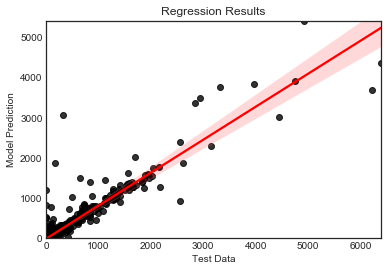

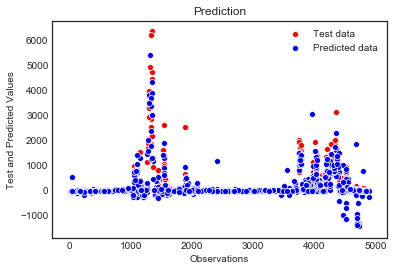

Mean Absolute Error: 80.5055592187044
Mean Squared Error: 51228.191722683405
Root Mean Squared Error: 226.33645690140906
R Squared: 0.8221552194654382


In [26]:
# 6. Artificial Neural Network
# scaling the dataset
std_scalar_X = StandardScaler()
std_scalar_Y = StandardScaler()
X_train_scaled = std_scalar_X.fit_transform(X_train)
X_test_scaled = std_scalar_Y.fit_transform(X_test)

def build_model():
    ann_reg = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[len(X_train.keys())]),
        layers.Dense(32, activation='relu'),
        layers.Dense(1) ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    ann_reg.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return ann_reg

ann_reg = build_model()
ann_reg.summary()

history = ann_reg.fit(X_train_scaled, y_train.values, epochs=1000, validation_split=0.25, verbose=1)
print(history.history.keys())
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')

y_pred_ann = ann_reg.predict(X_test_scaled).flatten()
# Regression Plot - ANN
reg_plot(y_test, y_pred_ann)
scatter_plot_comparison(y_test, y_pred_ann)
# Metrics for ANN
reg_metrics(y_test, y_pred_ann)

## Classification Algorithms

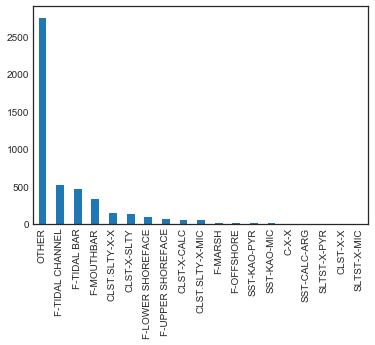

OTHER                2763
F-TIDAL CHANNEL       537
F-TIDAL BAR           476
F-MOUTHBAR            349
CLST.SLTY-X-X         156
CLST-X-SLTY           138
F-LOWER SHOREFACE     105
F-UPPER SHOREFACE      76
CLST-X-CALC            66
CLST.SLTY-X-MIC        59
F-MARSH                20
F-OFFSHORE             20
SST-KAO-PYR            19
SST-KAO-MIC            19
C-X-X                   5
SST-CALC-ARG            4
SLTST-X-PYR             2
CLST-X-X                2
SLTST-X-MIC             2
Name: LITHOTYPE, dtype: int64


In [27]:
# The response variable in the classification is 'Lithotype' with all remaining features as input'
data['LITHOTYPE'].value_counts().plot(kind='bar')
plt.show()
count_categ = data['LITHOTYPE'].value_counts()
print(count_categ)

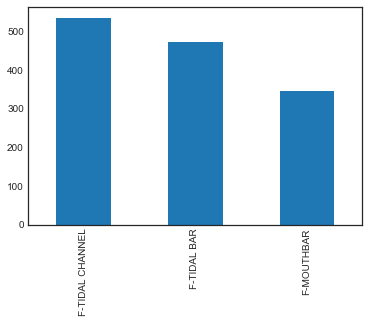

In [28]:
# As observed multiple categories are present, however 'other' won't be considered and
# only the categories with frequency of more than 200 will be included, i.e. 3 categories
data_categ = data[data['LITHOTYPE'].isin(count_categ[count_categ > 200].index)]
data_categ = data_categ[data_categ['LITHOTYPE'] != 'OTHER']
data_categ['LITHOTYPE'].value_counts()
data_categ['LITHOTYPE'].value_counts().plot(kind='bar')

In [29]:
data_categ.drop('WELL NAME', axis=1, inplace=True)
data_categ.info()
data_categ.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 1018 to 4658
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DEPTH (M)             1362 non-null   float64
 1   BVW (V/V)             1362 non-null   float64
 2   CARB_FLAG (UNITLESS)  1362 non-null   float64
 3   COAL_FLAG (UNITLESS)  1362 non-null   float64
 4   KLOGH (MD)            1362 non-null   float64
 5   PHIF (V/V)            1362 non-null   float64
 6   RHOFL (G/CM3)         1362 non-null   float64
 7   RHOMA (G/CM3)         1362 non-null   float64
 8   RW (OHMM)             1362 non-null   float64
 9   SAND_FLAG (UNITLESS)  1362 non-null   float64
 10  SW (V/V)              1362 non-null   float64
 11  TEMP (DEGC)           1362 non-null   float64
 12  VSH (V/V)             1362 non-null   float64
 13  LITHOTYPE             1362 non-null   object 
dtypes: float64(13), object(1)
memory usage: 159.6+ KB


,DEPTH (M),BVW (V/V),CARB_FLAG (UNITLESS),COAL_FLAG (UNITLESS),KLOGH (MD),PHIF (V/V),RHOFL (G/CM3),RHOMA (G/CM3),RW (OHMM),SAND_FLAG (UNITLESS),SW (V/V),TEMP (DEGC),VSH (V/V),LITHOTYPE
1018,3821.73,0.06,0.00,0.00,121.27,0.17,0.80,2.66,0.02,1.00,0.38,116.35,0.14,F-TIDAL BAR
1019,3821.89,0.05,1.00,0.00,0.10,0.12,0.80,2.71,0.02,0.00,0.44,116.35,0.12,F-TIDAL BAR
1020,3822.04,0.05,1.00,0.00,0.10,0.12,0.80,2.71,0.02,0.00,0.39,116.36,0.13,F-TIDAL BAR
1021,3822.19,0.04,1.00,0.00,0.10,0.11,0.80,2.71,0.02,0.00,0.38,116.36,0.11,F-TIDAL BAR
1022,3822.34,0.04,1.00,0.00,0.10,0.10,0.80,2.71,0.02,0.00,0.41,116.36,0.13,F-TIDAL BAR
1023,3822.50,0.04,1.00,0.00,0.10,0.10,0.80,2.71,0.02,0.00,0.44,116.37,0.11,F-TIDAL BAR
1024,3822.65,0.05,1.00,0.00,0.10,0.14,0.80,2.71,0.02,1.00,0.36,116.37,0.13,F-TIDAL BAR
1025,3822.80,0.05,0.00,0.00,43.90,0.14,0.80,2.66,0.02,1.00,0.37,116.37,0.16,F-TIDAL BAR
1026,3822.95,0.05,0.00,0.00,84.11,0.16,0.80,2.66,0.02,1.00,0.32,116.38,0.15,F-TIDAL BAR
1027,3823.11,0.05,0.00,0.00,79.38,0.15,0.80,2.66,0.02,1.00,0.34,116.38,0.14,F-TIDAL BAR


In [30]:
X = data_categ.iloc[:, :-1]
y = data_categ.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
print('Shape of Training X:', X_train.shape)
print('Shape of Training y:', y_train.shape)
print('Shape of Test X:', X_test.shape)
print('Shape of Test y:', y_test.shape)

Shape of Training X: (1021, 13)
Shape of Training y: (1021,)
Shape of Test X: (341, 13)
Shape of Test y: (341,)


In [32]:
# defining function for classification metrics
def clf_metrics(test, pred):
    '''Function returns basic metrics for classification models'''
    print('Classification Accuracy Score:', accuracy_score(test, pred))
    print('Confusion Matrix: \n', confusion_matrix(test, pred))
    print('Classification Report: \n', classification_report(test, pred))

In [33]:
# 1. Logistic Regression
clf_logreg = LogisticRegression()
clf_logreg.fit(X_train, y_train)
# Prediction on test data
y_pred_logreg = clf_logreg.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_logreg)

Classification Accuracy Score: 0.6480938416422287
Confusion Matrix: 
 [[  4  70  13]
 [  5 102  12]
 [  1  19 115]]
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.40      0.05      0.08        87
    F-TIDAL BAR       0.53      0.86      0.66       119
F-TIDAL CHANNEL       0.82      0.85      0.84       135

       accuracy                           0.65       341
      macro avg       0.59      0.58      0.53       341
   weighted avg       0.61      0.65      0.58       341



In [34]:
# 2. SVC
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
# Prediction on test data
y_pred_svc = clf_svc.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_svc)

Classification Accuracy Score: 0.6217008797653959
Confusion Matrix: 
 [[  0  76  11]
 [  0 103  16]
 [  0  26 109]]
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.00      0.00      0.00        87
    F-TIDAL BAR       0.50      0.87      0.64       119
F-TIDAL CHANNEL       0.80      0.81      0.80       135

       accuracy                           0.62       341
      macro avg       0.43      0.56      0.48       341
   weighted avg       0.49      0.62      0.54       341



In [35]:
# 3. Decision Tree Classifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
# Prediction on test data
y_pred_dt = clf_dt.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_dt)

Classification Accuracy Score: 0.9853372434017595
Confusion Matrix: 
 [[ 85   1   1]
 [  2 116   1]
 [  0   0 135]]
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.98      0.98      0.98        87
    F-TIDAL BAR       0.99      0.97      0.98       119
F-TIDAL CHANNEL       0.99      1.00      0.99       135

       accuracy                           0.99       341
      macro avg       0.98      0.98      0.98       341
   weighted avg       0.99      0.99      0.99       341



In [36]:
# 4. Random Forest Classifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
# Prediction on test data
y_pred_rf = clf_rf.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_rf)

Classification Accuracy Score: 0.9882697947214076
Confusion Matrix: 
 [[ 85   1   1]
 [  1 117   1]
 [  0   0 135]]
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.99      0.98      0.98        87
    F-TIDAL BAR       0.99      0.98      0.99       119
F-TIDAL CHANNEL       0.99      1.00      0.99       135

       accuracy                           0.99       341
      macro avg       0.99      0.99      0.99       341
   weighted avg       0.99      0.99      0.99       341



In [37]:
# 5. KNN
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
# Prediction on test data
y_pred_knn = clf_knn.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_knn)

Classification Accuracy Score: 0.8592375366568915
Confusion Matrix: 
 [[ 65  14   8]
 [  7 101  11]
 [  6   2 127]]
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.83      0.75      0.79        87
    F-TIDAL BAR       0.86      0.85      0.86       119
F-TIDAL CHANNEL       0.87      0.94      0.90       135

       accuracy                           0.86       341
      macro avg       0.86      0.85      0.85       341
   weighted avg       0.86      0.86      0.86       341



In [38]:
# 6. GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
# Prediction on test data
y_pred_gnb = clf_gnb.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_gnb)

Classification Accuracy Score: 0.6099706744868035
Confusion Matrix: 
 [[ 47  20  20]
 [ 62  41  16]
 [  9   6 120]]
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.40      0.54      0.46        87
    F-TIDAL BAR       0.61      0.34      0.44       119
F-TIDAL CHANNEL       0.77      0.89      0.82       135

       accuracy                           0.61       341
      macro avg       0.59      0.59      0.57       341
   weighted avg       0.62      0.61      0.60       341



In [39]:
# 7. LDA
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train, y_train)
# Prediction on test data
y_pred_lda = clf_lda.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_lda)

Classification Accuracy Score: 0.7800586510263929
Confusion Matrix: 
 [[ 49  29   9]
 [ 13  97   9]
 [  5  10 120]]
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.73      0.56      0.64        87
    F-TIDAL BAR       0.71      0.82      0.76       119
F-TIDAL CHANNEL       0.87      0.89      0.88       135

       accuracy                           0.78       341
      macro avg       0.77      0.76      0.76       341
   weighted avg       0.78      0.78      0.78       341



In [40]:
# 8. ANN

dataset = data_categ.values
X = dataset[:,0:12].astype(float)
Y = dataset[:,13]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# creating a dummy variable
dummy_y = np_utils.to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.25, random_state=42)

# define baseline model
def baseline_model():
    # create model
    model = tf.keras.Sequential()
    model.add(layers.Dense(64, input_dim=12, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model

ann_clf = baseline_model()
ann_clf.summary()

ann_classifier = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=1)
# Cross Validation Score
kfold = KFold(n_splits=3, shuffle=True)
results = cross_val_score(ann_classifier, X, dummy_y, cv=kfold)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                832       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 5,187
Trainable params: 5,187
Non-trainable params: 0
_________________________________________________________________
Train on 908 samples
Epoch 1/200
908/908 [==============================] - 1s 869us/sample - loss: 30.0472 - acc: 0.5132
Epoch 2/200
908/908 [==============================] - 0s 278us/sample - loss: 10.9312 - acc: 0.5275
Epoch 3/200
908/908 [==============================] - 0s 271us/sample - loss: 12.5886 - acc: 0.5297
Epoch 4/200
908/908 [==============================] - 0s 

Epoch 74/200
908/908 [==============================] - 0s 224us/sample - loss: 1.1730 - acc: 0.5716
Epoch 75/200
908/908 [==============================] - 0s 221us/sample - loss: 1.0489 - acc: 0.5463
Epoch 76/200
908/908 [==============================] - 0s 216us/sample - loss: 0.9957 - acc: 0.5540
Epoch 77/200
908/908 [==============================] - 0s 265us/sample - loss: 0.9875 - acc: 0.5694
Epoch 78/200
908/908 [==============================] - 0s 223us/sample - loss: 0.9141 - acc: 0.5837
Epoch 79/200
908/908 [==============================] - 0s 220us/sample - loss: 1.0014 - acc: 0.5782
Epoch 80/200
908/908 [==============================] - 0s 217us/sample - loss: 0.9375 - acc: 0.5859
Epoch 81/200
908/908 [==============================] - 0s 217us/sample - loss: 0.9821 - acc: 0.5562
Epoch 82/200
908/908 [==============================] - 0s 250us/sample - loss: 0.9840 - acc: 0.5650
Epoch 83/200
908/908 [==============================] - 0s 232us/sample - loss: 0.9616 - ac

908/908 [==============================] - 0s 223us/sample - loss: 2.8006 - acc: 0.5507
Epoch 34/200
908/908 [==============================] - 0s 213us/sample - loss: 1.8838 - acc: 0.5518
Epoch 35/200
908/908 [==============================] - 0s 210us/sample - loss: 2.2787 - acc: 0.5242
Epoch 36/200
908/908 [==============================] - 0s 232us/sample - loss: 2.3328 - acc: 0.5485
Epoch 37/200
908/908 [==============================] - 0s 239us/sample - loss: 1.8282 - acc: 0.5297
Epoch 38/200
908/908 [==============================] - 0s 219us/sample - loss: 2.0946 - acc: 0.5407
Epoch 39/200
908/908 [==============================] - 0s 210us/sample - loss: 1.9271 - acc: 0.5639
Epoch 40/200
908/908 [==============================] - 0s 210us/sample - loss: 2.4337 - acc: 0.5264
Epoch 41/200
908/908 [==============================] - 0s 234us/sample - loss: 1.9628 - acc: 0.5551
Epoch 42/200
908/908 [==============================] - 0s 239us/sample - loss: 1.9550 - acc: 0.5617
Epo

908/908 [==============================] - 0s 238us/sample - loss: 0.8042 - acc: 0.6256
Epoch 115/200
908/908 [==============================] - 0s 216us/sample - loss: 0.8021 - acc: 0.6267
Epoch 116/200
908/908 [==============================] - 0s 212us/sample - loss: 0.8047 - acc: 0.6267
Epoch 117/200
908/908 [==============================] - 0s 212us/sample - loss: 0.7966 - acc: 0.6355
Epoch 118/200
908/908 [==============================] - 0s 243us/sample - loss: 0.7919 - acc: 0.6443
Epoch 119/200
908/908 [==============================] - 0s 234us/sample - loss: 0.8120 - acc: 0.6278
Epoch 120/200
908/908 [==============================] - 0s 214us/sample - loss: 0.8063 - acc: 0.6278
Epoch 121/200
908/908 [==============================] - 0s 211us/sample - loss: 0.8012 - acc: 0.6211
Epoch 122/200
908/908 [==============================] - 0s 213us/sample - loss: 0.8000 - acc: 0.6233
Epoch 123/200
908/908 [==============================] - 0s 243us/sample - loss: 0.7979 - acc: 0

908/908 [==============================] - 0s 217us/sample - loss: 0.9791 - acc: 0.5617
Epoch 75/200
908/908 [==============================] - 0s 233us/sample - loss: 0.9766 - acc: 0.5584
Epoch 76/200
908/908 [==============================] - 0s 234us/sample - loss: 1.0269 - acc: 0.5738
Epoch 77/200
908/908 [==============================] - 0s 215us/sample - loss: 0.9718 - acc: 0.5859
Epoch 78/200
908/908 [==============================] - 0s 211us/sample - loss: 0.9110 - acc: 0.5705
Epoch 79/200
908/908 [==============================] - 0s 214us/sample - loss: 0.9508 - acc: 0.6156
Epoch 80/200
908/908 [==============================] - 0s 225us/sample - loss: 0.9458 - acc: 0.5804
Epoch 81/200
908/908 [==============================] - 0s 236us/sample - loss: 0.9446 - acc: 0.5672
Epoch 82/200
908/908 [==============================] - 0s 214us/sample - loss: 0.9371 - acc: 0.5749
Epoch 83/200
908/908 [==============================] - 0s 214us/sample - loss: 0.8894 - acc: 0.5914
Epo

In [41]:
print("Base Model Accuracy (Standard Deviation): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Base Model Accuracy (Standard Deviation): 61.67% (2.55%)


## Unsupervised Learning

In [42]:
# original dataset with all features
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4890
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WELL NAME             4818 non-null   object 
 1   DEPTH (M)             4818 non-null   float64
 2   BVW (V/V)             4818 non-null   float64
 3   CARB_FLAG (UNITLESS)  4818 non-null   float64
 4   COAL_FLAG (UNITLESS)  4818 non-null   float64
 5   KLOGH (MD)            4818 non-null   float64
 6   PHIF (V/V)            4818 non-null   float64
 7   RHOFL (G/CM3)         4818 non-null   float64
 8   RHOMA (G/CM3)         4818 non-null   float64
 9   RW (OHMM)             4818 non-null   float64
 10  SAND_FLAG (UNITLESS)  4818 non-null   float64
 11  SW (V/V)              4818 non-null   float64
 12  TEMP (DEGC)           4818 non-null   float64
 13  VSH (V/V)             4818 non-null   float64
 14  LITHOTYPE             4818 non-null   object 
dtypes: float64(13), objec

,WELL NAME,DEPTH (M),BVW (V/V),CARB_FLAG (UNITLESS),COAL_FLAG (UNITLESS),KLOGH (MD),PHIF (V/V),RHOFL (G/CM3),RHOMA (G/CM3),RW (OHMM),SAND_FLAG (UNITLESS),SW (V/V),TEMP (DEGC),VSH (V/V),LITHOTYPE
0,15/9-19 A,3666.59,0.11,0.00,0.00,0.00,0.20,0.80,2.66,0.02,0.00,0.56,112.72,0.60,OTHER
1,15/9-19 A,3666.74,0.11,0.00,0.00,0.00,0.22,0.80,2.66,0.02,0.00,0.51,112.73,0.60,OTHER
2,15/9-19 A,3666.90,0.11,0.00,0.00,0.00,0.24,0.80,2.66,0.02,0.00,0.47,112.73,0.60,OTHER
3,15/9-19 A,3667.05,0.11,0.00,0.00,0.00,0.23,0.80,2.66,0.02,0.00,0.51,112.74,0.60,OTHER
4,15/9-19 A,3667.20,0.12,0.00,0.00,0.00,0.22,0.80,2.66,0.02,0.00,0.54,112.74,0.60,CLST.SLTY-X-X
5,15/9-19 A,3667.35,0.11,0.00,0.00,0.00,0.18,0.80,2.66,0.02,0.00,0.63,112.74,0.60,OTHER
6,15/9-19 A,3667.51,0.12,0.00,0.00,0.00,0.20,0.80,2.66,0.02,0.00,0.60,112.75,0.60,OTHER
7,15/9-19 A,3667.66,0.12,0.00,0.00,0.00,0.22,0.80,2.66,0.02,0.00,0.57,112.75,0.60,OTHER
8,15/9-19 A,3667.81,0.13,0.00,0.00,0.00,0.24,0.80,2.66,0.02,0.00,0.53,112.75,0.60,OTHER
9,15/9-19 A,3667.96,0.13,0.00,0.00,0.00,0.26,0.80,2.66,0.02,0.00,0.50,112.76,0.61,CLST.SLTY-X-X


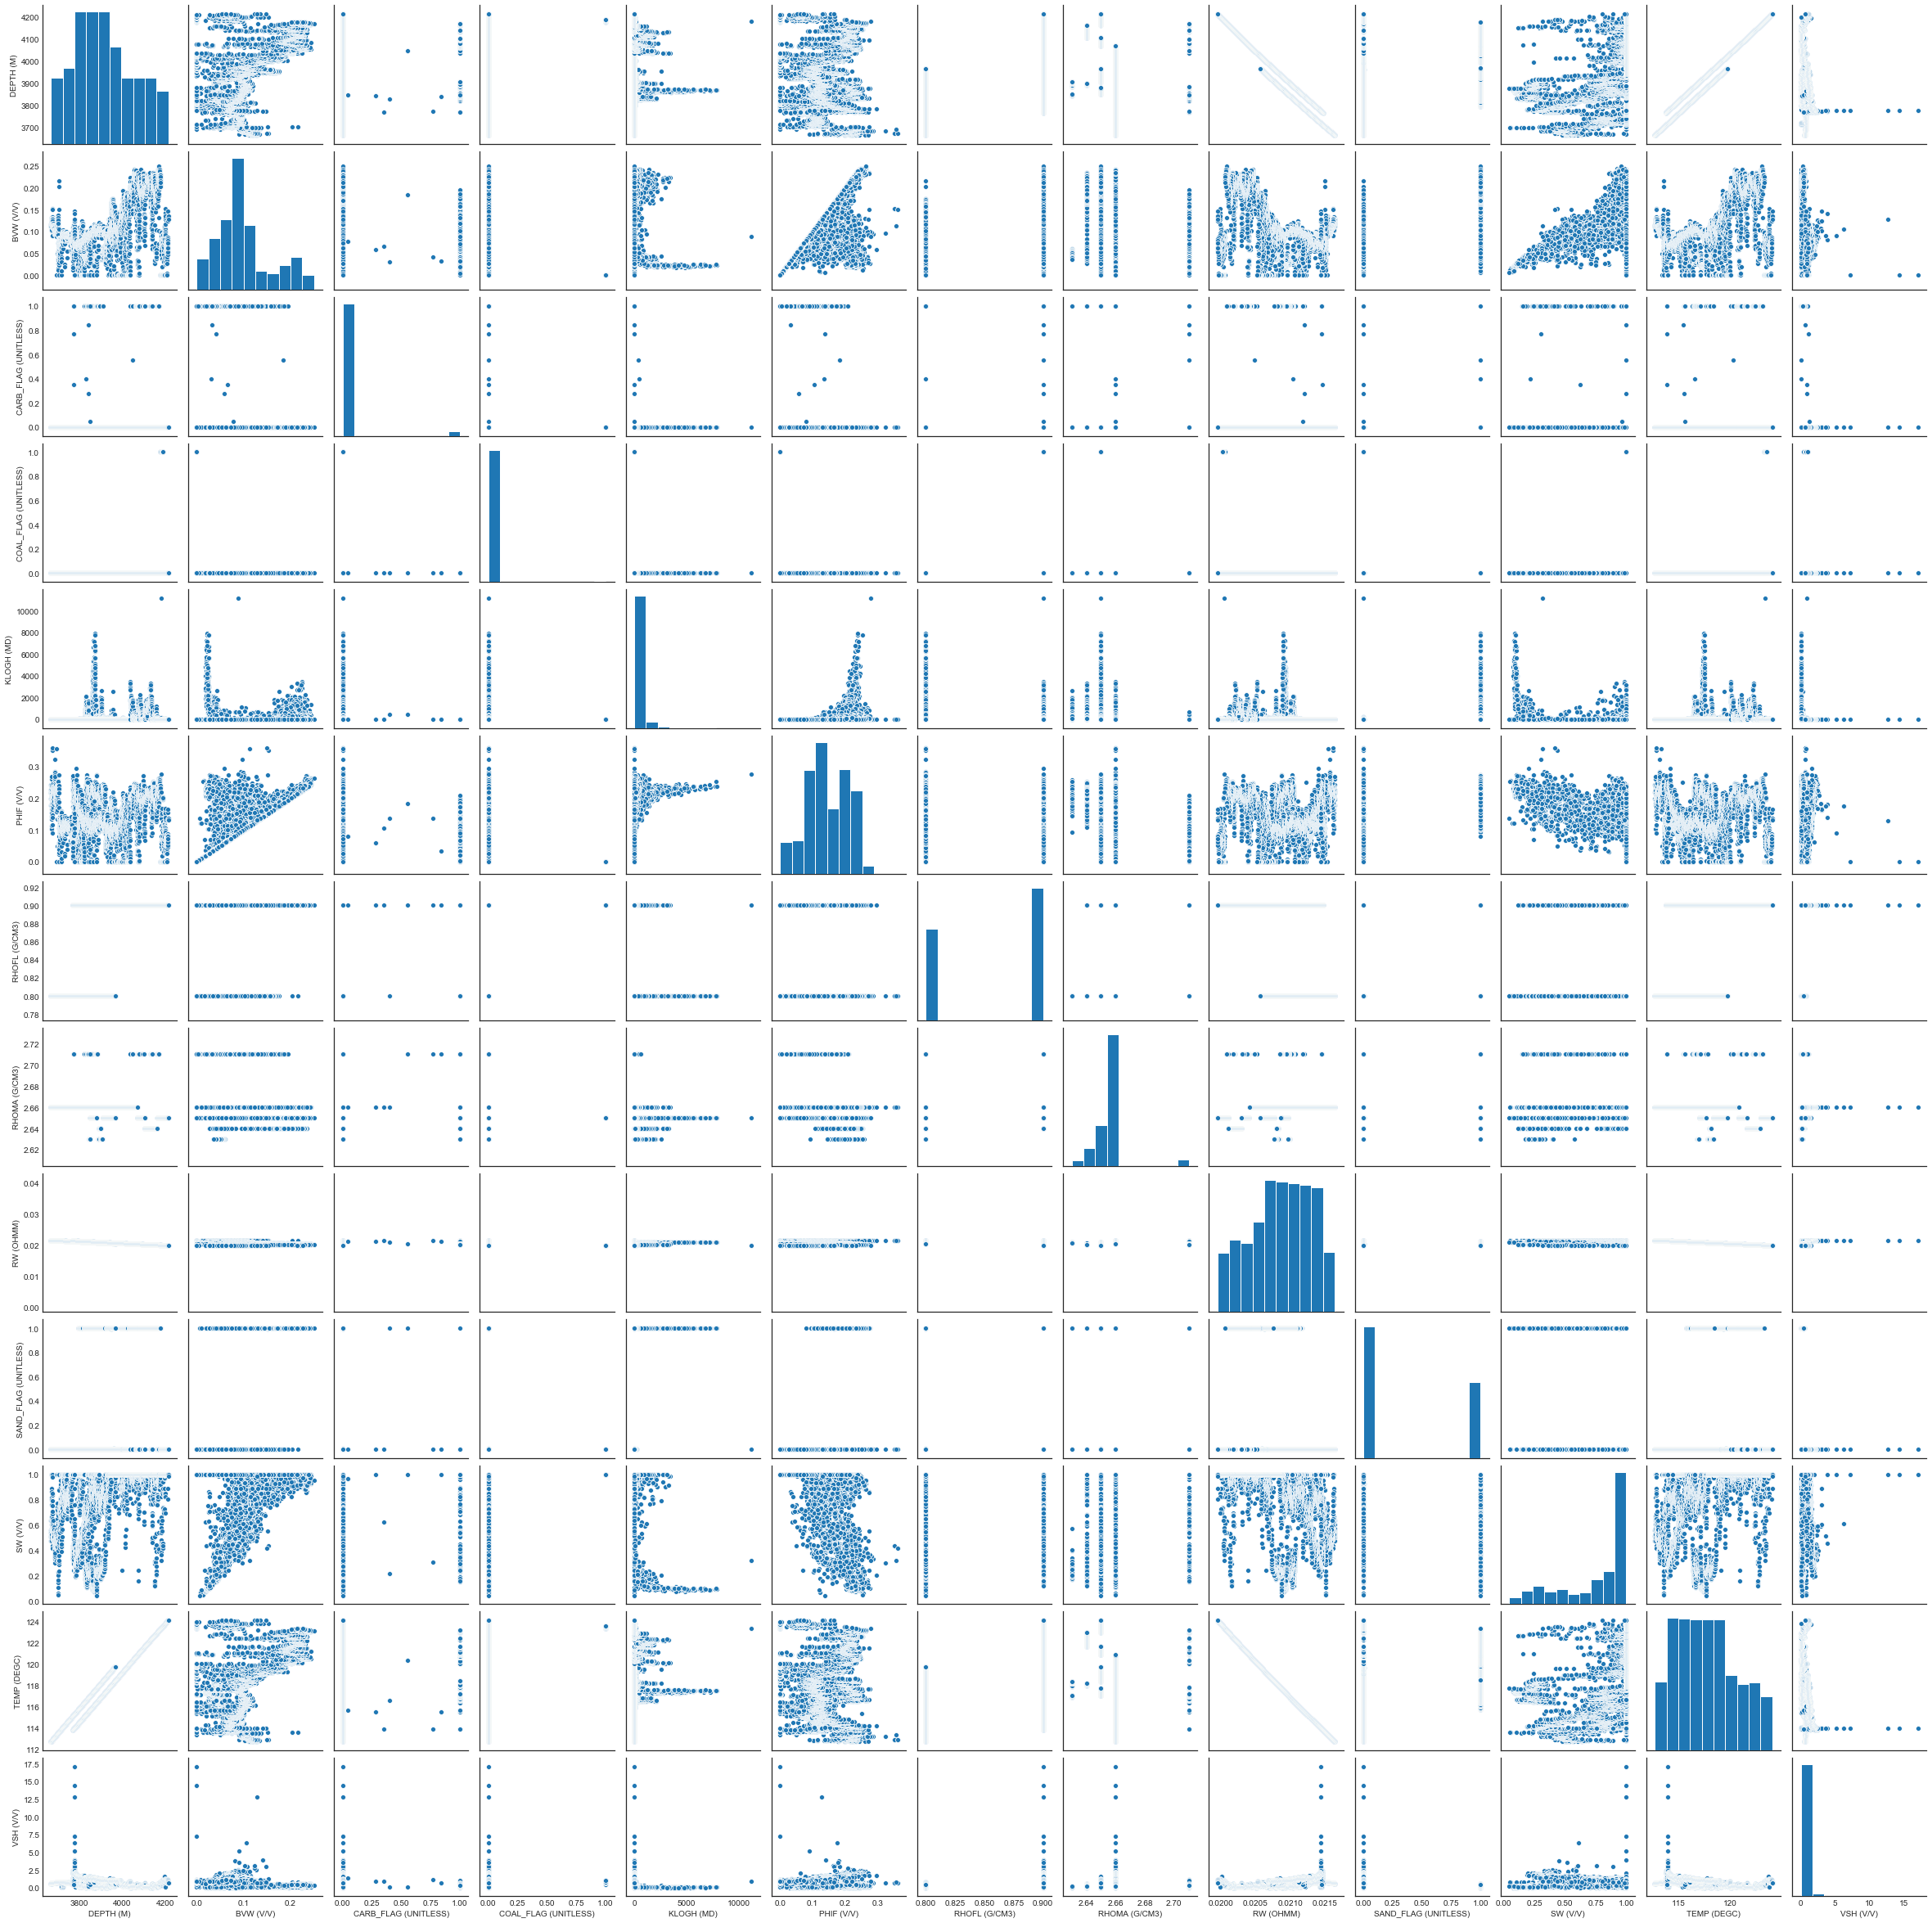

In [43]:
sns.pairplot(data)

In [44]:
X = data.drop(['WELL NAME', 'LITHOTYPE'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4890
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DEPTH (M)             4818 non-null   float64
 1   BVW (V/V)             4818 non-null   float64
 2   CARB_FLAG (UNITLESS)  4818 non-null   float64
 3   COAL_FLAG (UNITLESS)  4818 non-null   float64
 4   KLOGH (MD)            4818 non-null   float64
 5   PHIF (V/V)            4818 non-null   float64
 6   RHOFL (G/CM3)         4818 non-null   float64
 7   RHOMA (G/CM3)         4818 non-null   float64
 8   RW (OHMM)             4818 non-null   float64
 9   SAND_FLAG (UNITLESS)  4818 non-null   float64
 10  SW (V/V)              4818 non-null   float64
 11  TEMP (DEGC)           4818 non-null   float64
 12  VSH (V/V)             4818 non-null   float64
dtypes: float64(13)
memory usage: 687.0 KB


Text(0, 0.5, 'Inertia')

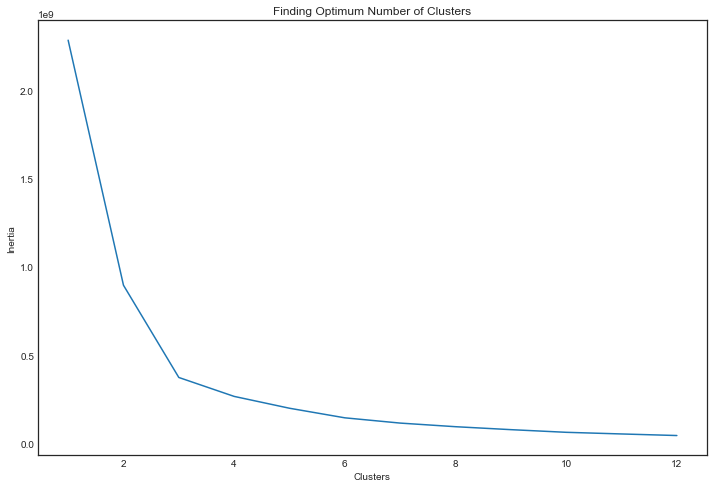

In [45]:
# KMeans Clustering

# finding the optimum number of clusters in the dataset
clusters = []
for i in range(1, 13):
    km = cluster.KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

# finding the number of clusters
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 13)), y=clusters, ax=ax)
ax.set_title('Finding Optimum Number of Clusters')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Text(0.5, 1.0, 'KMeans with 3 Clusters')

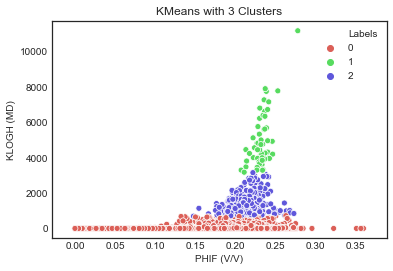

In [46]:
#  Visual Plot - 3 cluster
km3 = cluster.KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(X)
X['Labels'] = km3.labels_
X['Labels'].value_counts()
sns.scatterplot(X['PHIF (V/V)'], X['KLOGH (MD)'], hue=X['Labels'], palette=sns.color_palette('hls', X['Labels'].nunique()))
plt.title('KMeans with 3 Clusters')

In [47]:
# PCA 

data_categ.info()
dataset = data_categ.values
# One hot encoding example instead of LabelEncoder used earlier
# Encoding - Convert categorical variables to numerical form, to execute machine learning algorithms
X = data_categ.drop('LITHOTYPE', 1)
y = data_categ['LITHOTYPE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 1018 to 4658
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DEPTH (M)             1362 non-null   float64
 1   BVW (V/V)             1362 non-null   float64
 2   CARB_FLAG (UNITLESS)  1362 non-null   float64
 3   COAL_FLAG (UNITLESS)  1362 non-null   float64
 4   KLOGH (MD)            1362 non-null   float64
 5   PHIF (V/V)            1362 non-null   float64
 6   RHOFL (G/CM3)         1362 non-null   float64
 7   RHOMA (G/CM3)         1362 non-null   float64
 8   RW (OHMM)             1362 non-null   float64
 9   SAND_FLAG (UNITLESS)  1362 non-null   float64
 10  SW (V/V)              1362 non-null   float64
 11  TEMP (DEGC)           1362 non-null   float64
 12  VSH (V/V)             1362 non-null   float64
 13  LITHOTYPE             1362 non-null   object 
dtypes: float64(13), object(1)
memory usage: 159.6+ KB
[4.32302153e-01 2.4

In [48]:
# 4 components can explain around 86.6% variablility 
# only 4 components will be used to test classification 
pca_4comp = PCA(n_components=4)
X_train_4comp = pca_4comp.fit_transform(X_train)
X_test_4comp = pca_4comp.transform(X_test)

In [49]:
# Random Forest with entire data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 60   3   3]
 [  2  83   7]
 [  1   1 113]]
0.9377289377289377


In [50]:
# Random Forest with only 4 components
classifier_4comp = RandomForestClassifier(random_state=42)
classifier_4comp.fit(X_train_4comp, y_train)
# Predicting the Test set results
y_pred_4comp= classifier_4comp.predict(X_test_4comp)
print(confusion_matrix(y_test, y_pred_4comp))
print(accuracy_score(y_test, y_pred_4comp))

[[ 58   6   2]
 [  5  80   7]
 [  4   4 107]]
0.8974358974358975
